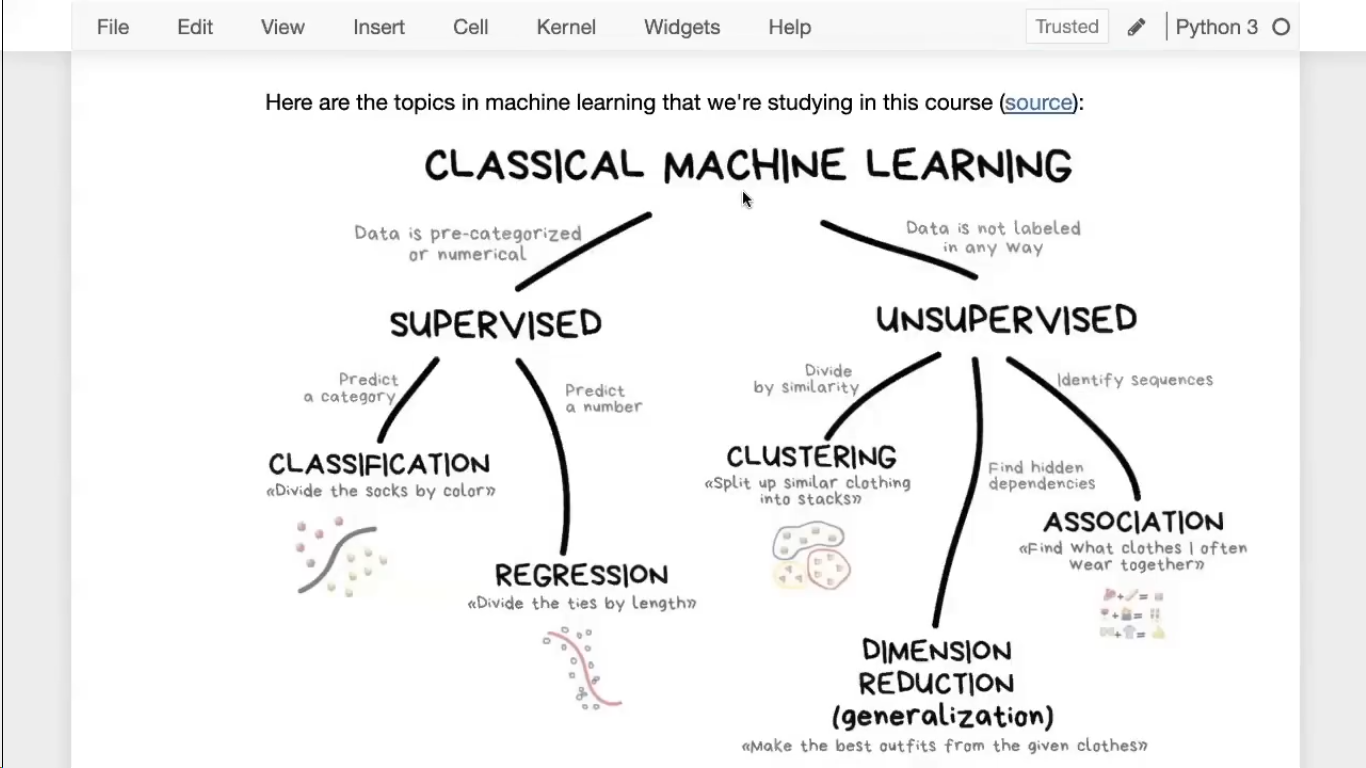

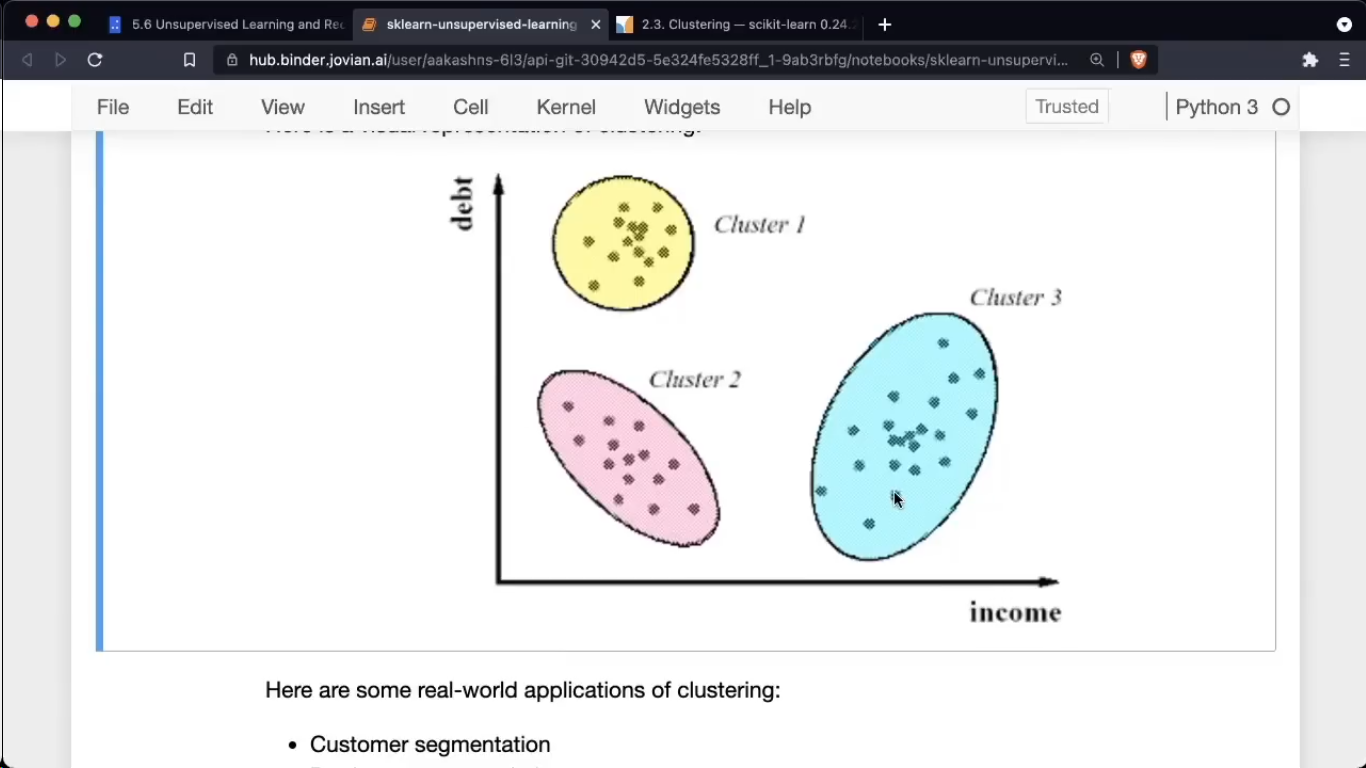

Some real world applications of clustering:
- Customer segmntation
- Product recommendation
- Feature engineering
- Anomally/fraud detection
- Taxonomy creation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 11)
plt.rcParams["font.size"] = 11

In [2]:
iris_df = sns.load_dataset("iris")

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: xlabel='sepal_length', ylabel='petal_length'>

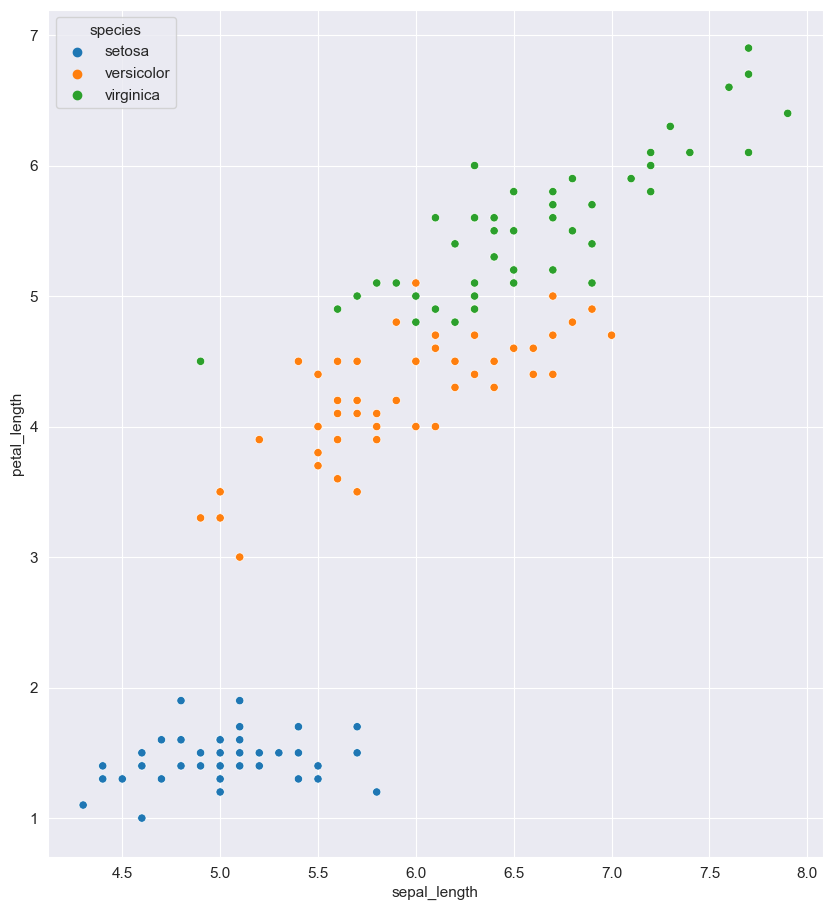

In [5]:
sns.scatterplot(data=iris_df, hue="species", x="sepal_length", y="petal_length")

<Axes: xlabel='sepal_width', ylabel='petal_width'>

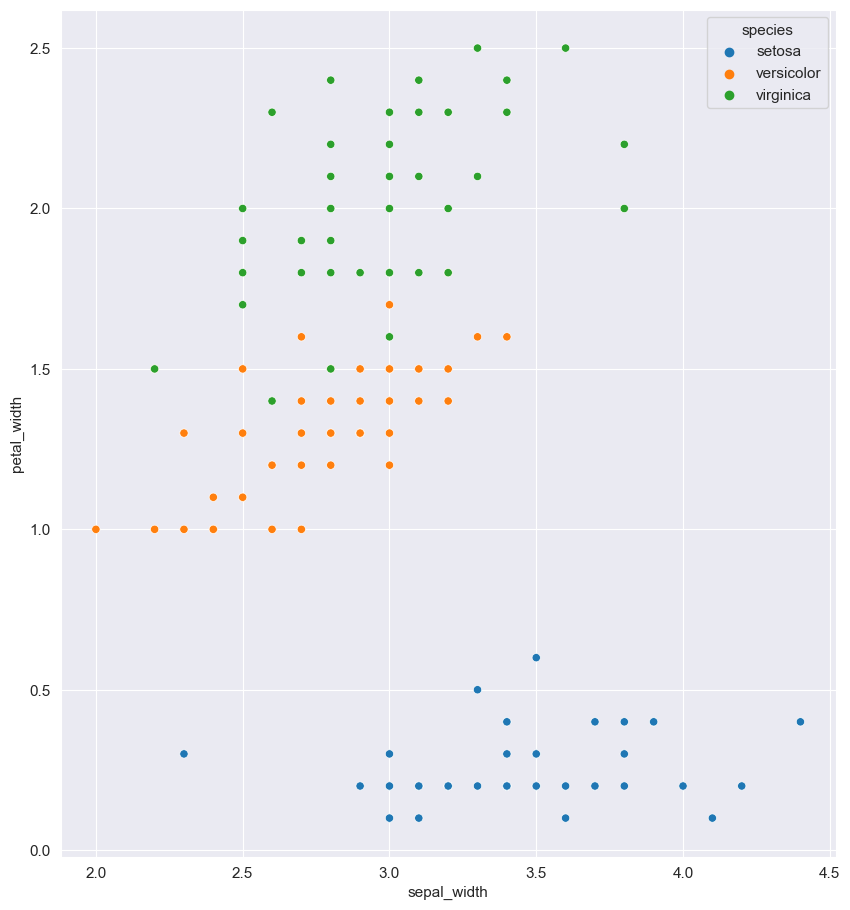

In [6]:
sns.scatterplot(data=iris_df, hue="species", x="sepal_width", y="petal_width")

## K-Means Clustering

The K-means algorith attemots to classify objects into a pre-determines number of clusters by finding the optimal points (called centroids) for each cluster. Each object is classified as belonging the cluster represented by the closest centroid

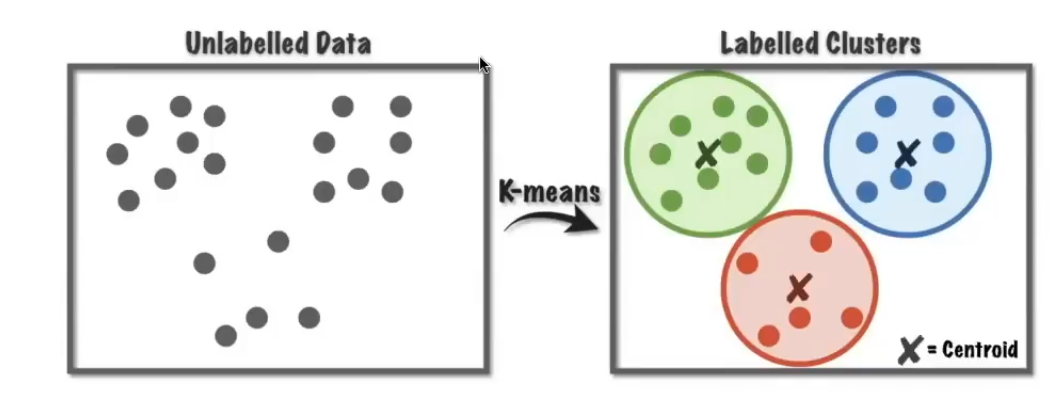

How the K-means works
1. Pick K random objects as the initial cluster centers
2. Classify each object into the cluster whose center is closest to the point
3. For each cluster of classified objects, compute the centroid (mean)
4. Now reclassify each object using the centroids as cluster centers
5. Calculate the total variance of the clusters (this is the measure of goodness)
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

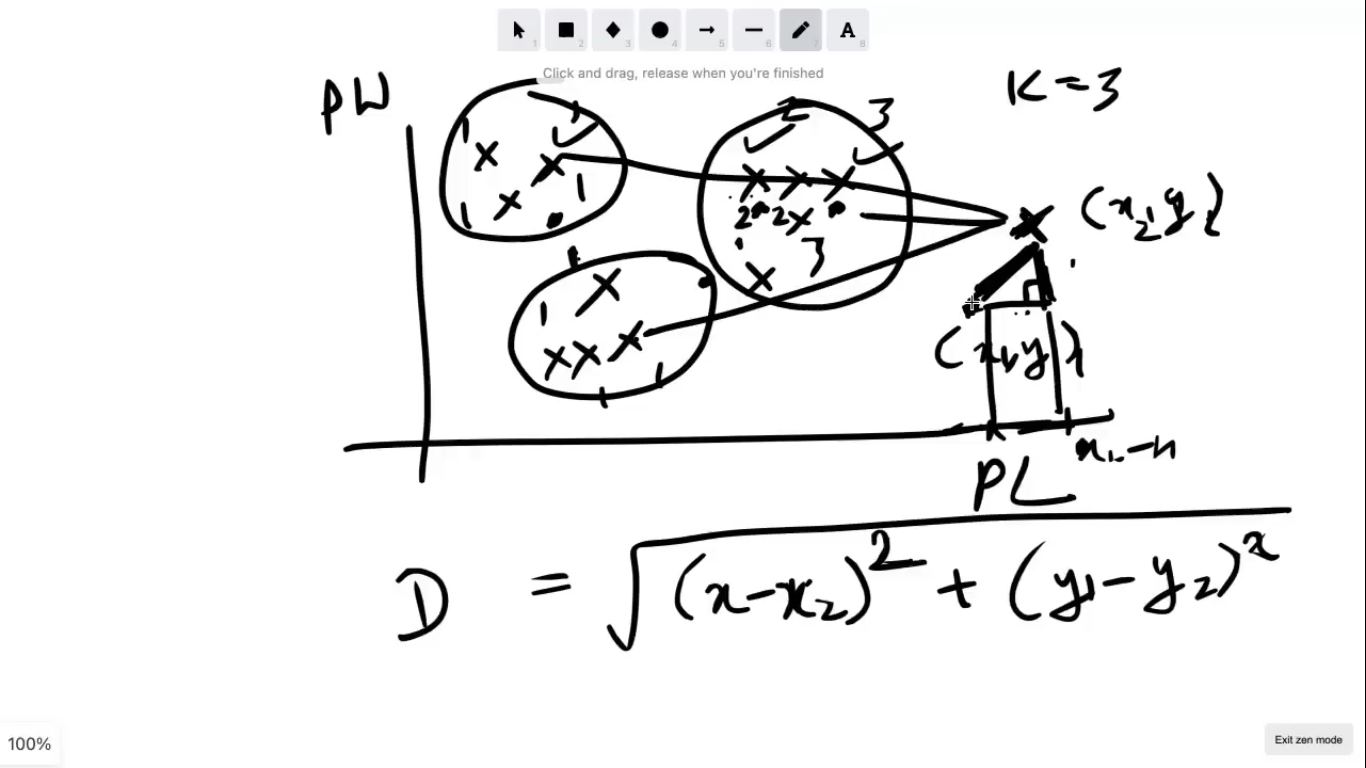

In [17]:
numeric_cols = iris_df.select_dtypes(np.number).columns.tolist()
categorical_cols = iris_df.select_dtypes("object").columns.tolist()

In [14]:
X = iris_df[numeric_cols].copy()

In [15]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [80]:
from sklearn.cluster import KMeans

In [83]:
model = KMeans(n_clusters=3, random_state=42)

In [84]:
model.fit(X)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [85]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [86]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [88]:
X.shape, preds.shape

((150, 4), (150,))

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_6032\821870093.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xb" (-> color='b'). The keyword argument will take precedence.
  plt.plot(centers_x, centers_y, "xb", color="r");


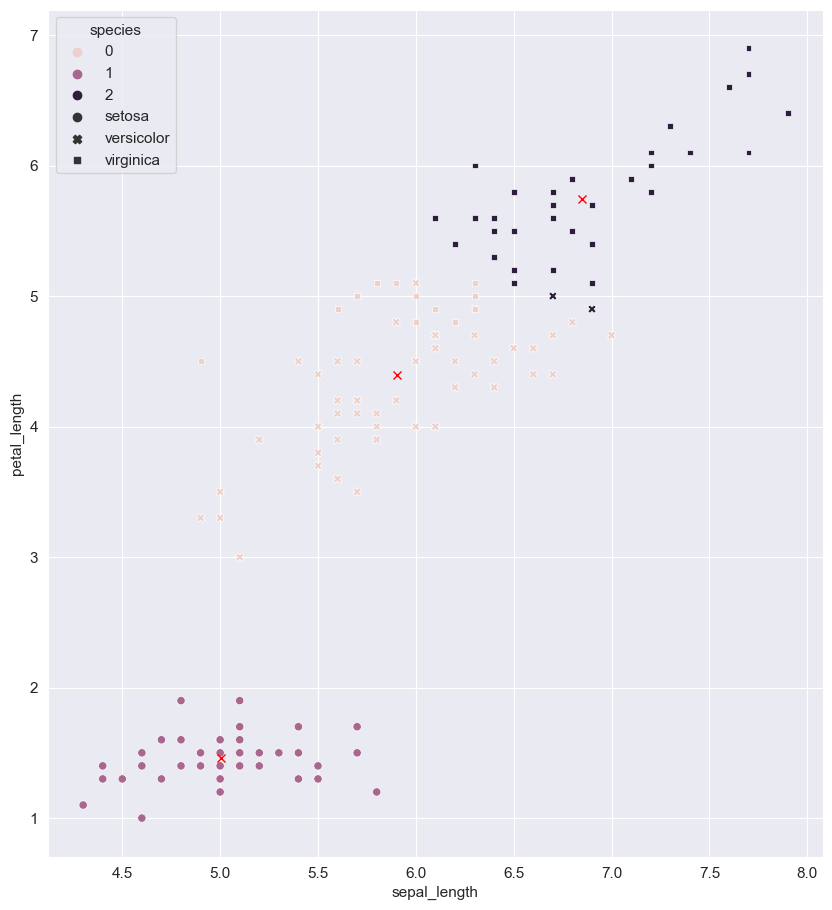

In [89]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length',style=iris_df.species, hue=preds)
centers_x, centers_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]
plt.plot(centers_x, centers_y, "xb", color="r");

In [58]:
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[0, :]
centers_x.shape,centers_y.shape

((3,), (4,))

In [51]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [90]:
model.cluster_centers_[0, :]

array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097])

In [91]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [92]:
model.cluster_centers_[:, 0]

array([5.9016129, 5.006    , 6.85     ])

In [93]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [94]:
model.inertia_

78.85144142614601

In [102]:
def RunKMeans(clusters_num, *params):
    inertia = []
    for n_clusters in clusters_num:
        modl = KMeans(n_clusters, random_state=42, *params).fit(X)
        inertia.append(modl.inertia_)
        
    plt.title("No of clusters vs inertias")
    plt.plot(clusters_num, inertia)
    plt.xlabel("No. of clusters (K)")
    plt.ylabel("Inertia")
    plt.show()

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


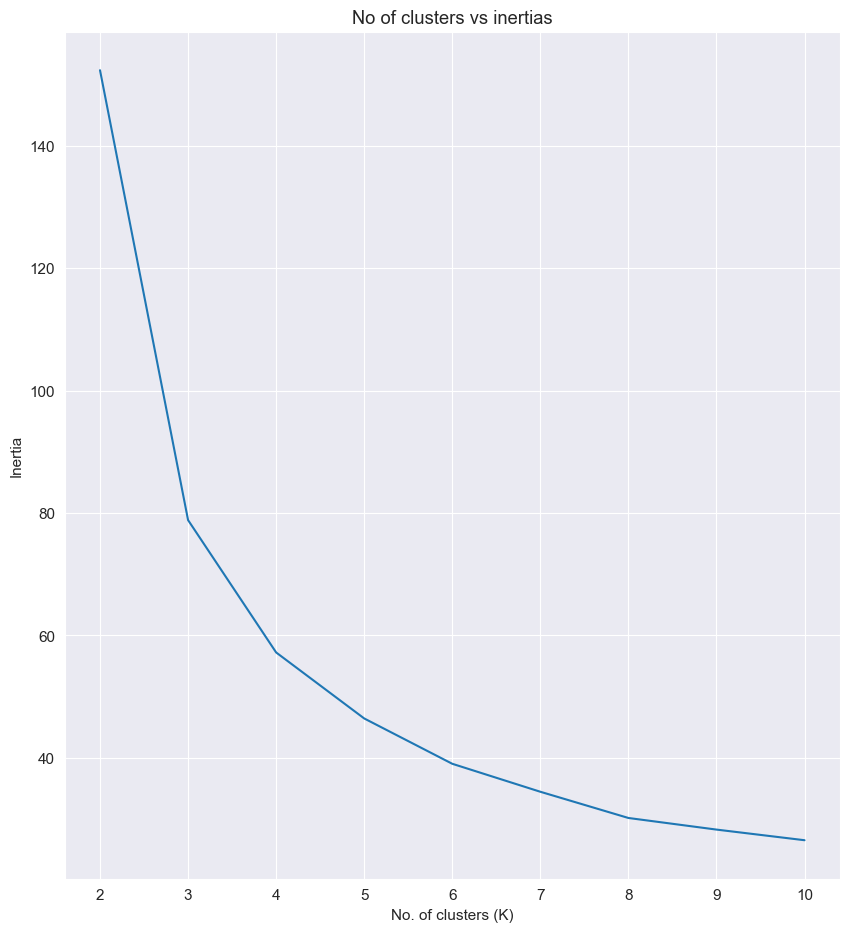

In [103]:
RunKMeans(range(2, 11))

<h1>Exercise:</h1>Perfrom clustering on the <a href="www.google.com">Mail customers dataset</a> on kaggle. Study the segments carefully and report your observations

In [106]:
?KMeans